In [1]:
import numpy as np
import torch
from torch import tensor

In [2]:
%matplotlib inline

In [3]:
from matplotlib import pyplot as plt
from functools import partial

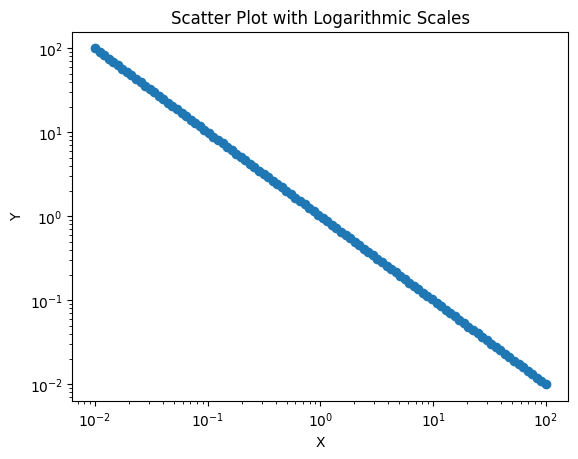

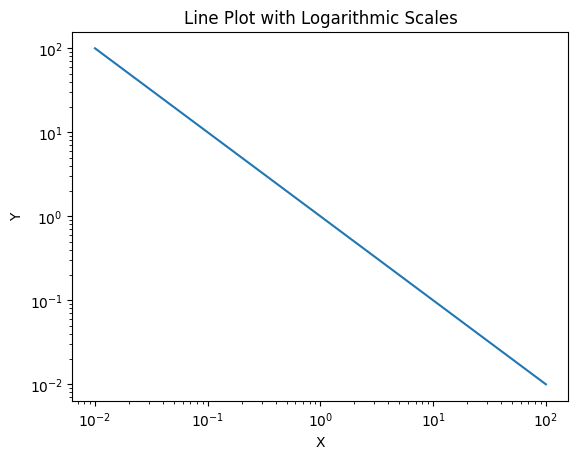

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# example data
x = np.logspace(-2, 2, 100)
y = 1 / x

# create the scatter plot with logarithmic scales
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Scatter Plot with Logarithmic Scales')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# create the line plot with logarithmic scales
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Line Plot with Logarithmic Scales')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# show the plots
plt.show()


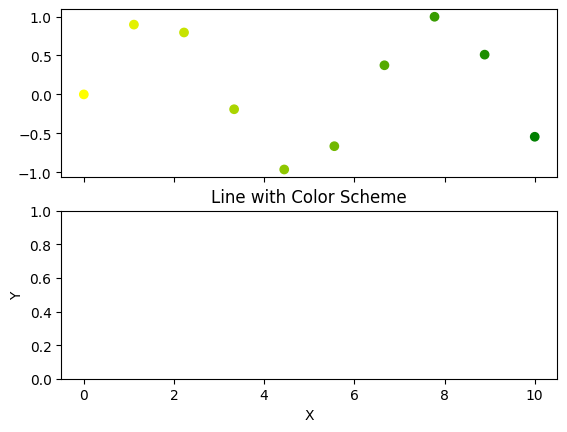

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# example data
x = np.linspace(0, 10, 10)
y = np.sin(x)

cmap = mcolors.LinearSegmentedColormap.from_list('mycmap', ['yellow', 'green'])

def scatter(ax, x, y):
    num_points = len(x)
    ax.scatter(x, y, c=range(num_points), cmap=cmap)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)    
scatter(ax1, x, y)
plt.title('Line with Color Scheme')
plt.xlabel('X')
plt.ylabel('Y')

# show the plot
plt.show()


In [6]:
cmap(5)

(0.9803921568627451, 0.9902345251826221, 0.0, 1.0)

In [7]:
def sgd(lr):
    def sgd_step(w, g): return w - lr * g
    return sgd_step

In [8]:
def p(f, g, opt, start=0, end=1, noise=0.0, w0=1.0, steps=300, log=False):
    points = 300
    x = np.linspace(start, end, points)
    state = np.random.get_state()
    np.random.seed(1)
    noise_x = noise * np.random.randn(points)
    y = f(x + noise_x)
    r = g(x + noise_x)
    xs = []
    ys = []
    gs = []
    xs.append(w0)
    ys.append(f(w0))
    updates = []
    
    w = w0
    for i in range(steps):
        rr = g(w+noise*np.random.randn())
        gs.append(rr)
        w_old = w
        w = opt(w, rr)
        xs.append(w)
        ys.append(f(w))
        updates.append(w - w_old)
    np.random.set_state(state)
    fig, ax = plt.subplots(2, 2, figsize=(16,8))
    ax[0,0].plot(x, y, xs, ys, '-')
    scatter(ax[0,0], xs, ys)
    #ax[0,0].set_xscale('log')
    if log: ax[0,0].set_yscale('log')
    ax[0,0].legend("loss(x) w,loss(w)".split())
    ax[0,1].plot(range(len(gs)), gs, 'r')
    ax[0,1].set_title(r"$\nabla loss(w_t)$")
    
    ax[1,0].plot(range(len(ys)), ys)
    ax[1,0].set_title("$loss(w_t)$")
    if log: ax[1,0].set_yscale('log')
    ax[1,1].plot(range(len(updates)), [-l for l in updates], 'r')
    ax[1,1].set_title("$\Delta w_t$")

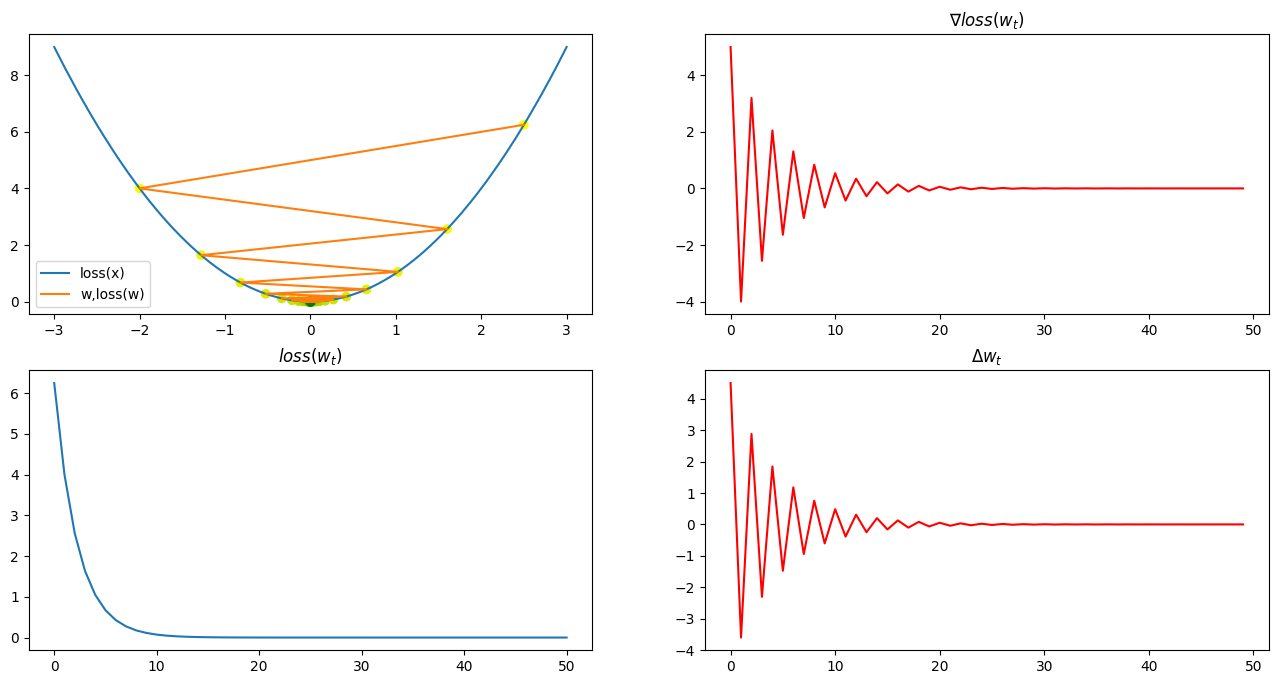

In [9]:
    p(lambda x: x**2, lambda x: 2*x, partial(sgd, lr=1.-0.1), start=-3, end=3, noise=0.0001, w0=2.5, steps=50, log=False)

In [10]:
class adam:
    def __init__(self, alpha=0.001, beta1=0.9, beta2=0.99, eps=1e-8):
        self.alpha, self.beta1, self.beta2 = alpha, beta1, beta2
        self.m = 0.0
        self.v = 0.0
        self.step = 0
        self.eps = eps
    
    def __call__(self, x, g):
        self.step += 1
        self.m = self.beta1 * self.m + (1-self.beta1) * g
        self.v = self.beta2 * self.v + (1-self.beta2) * g * g
        m = self.m / (1-self.beta1 ** self.step)
        v = self.v / (1-self.beta2 ** self.step)
        return x - self.alpha * m / (np.sqrt(v) + self.eps)

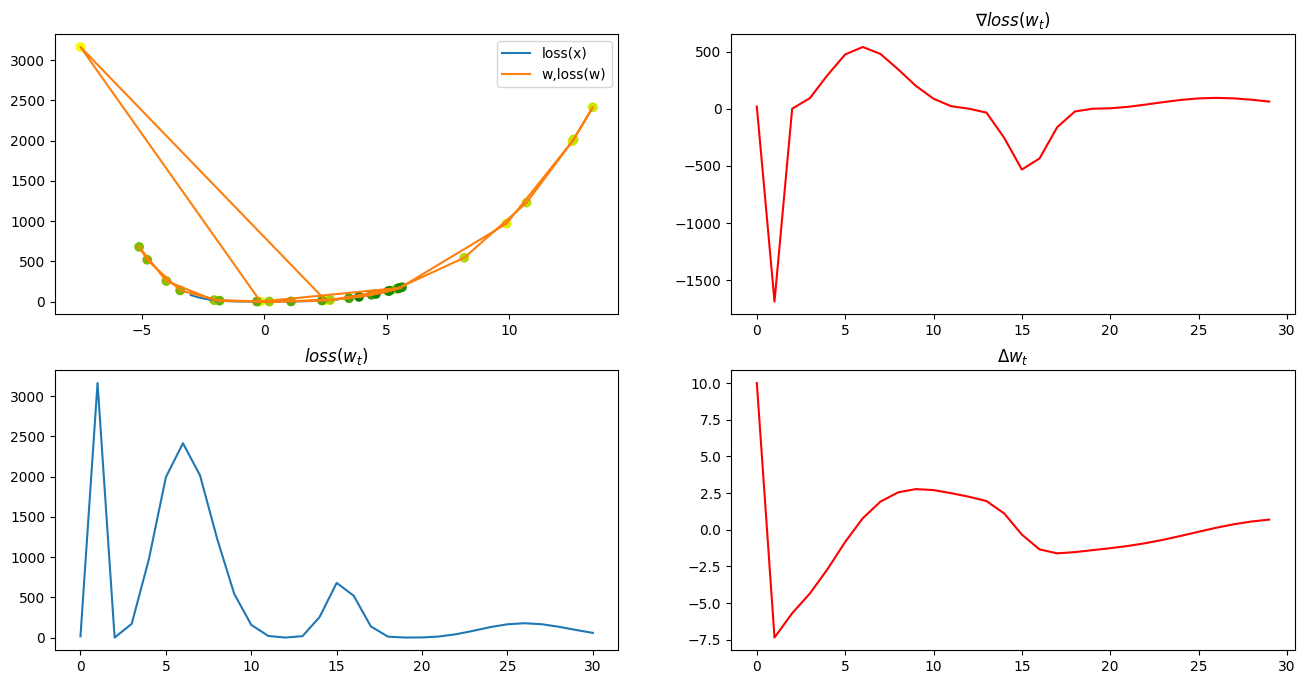

In [11]:
f_prime = lambda x: np.where(x < 0, 4*x**3, np.where(x > 0, 3*x**2, 0))
    
p(lambda x: np.where(x < 0, x**4, np.where(x > 0, x**3, 0)), f_prime, adam(alpha=10), -3, 3, noise=0.0001, w0=2.5, steps=30, log=False)

In [12]:
def lion(lr=0.1, b1=0.9, b2=0.99):
    lion.exp_avg = 0 # shared state betwen multiple calls to lion_step
    def lion_step(w, g):
        plus_minus = np.sign(lion.exp_avg * b1 + grad * (1 - b1))
        w -= lr * plus_minus
        lion.exp_avg = lion.exp_avg*b2 + (1-b2)*g
        return w
    return lion_step


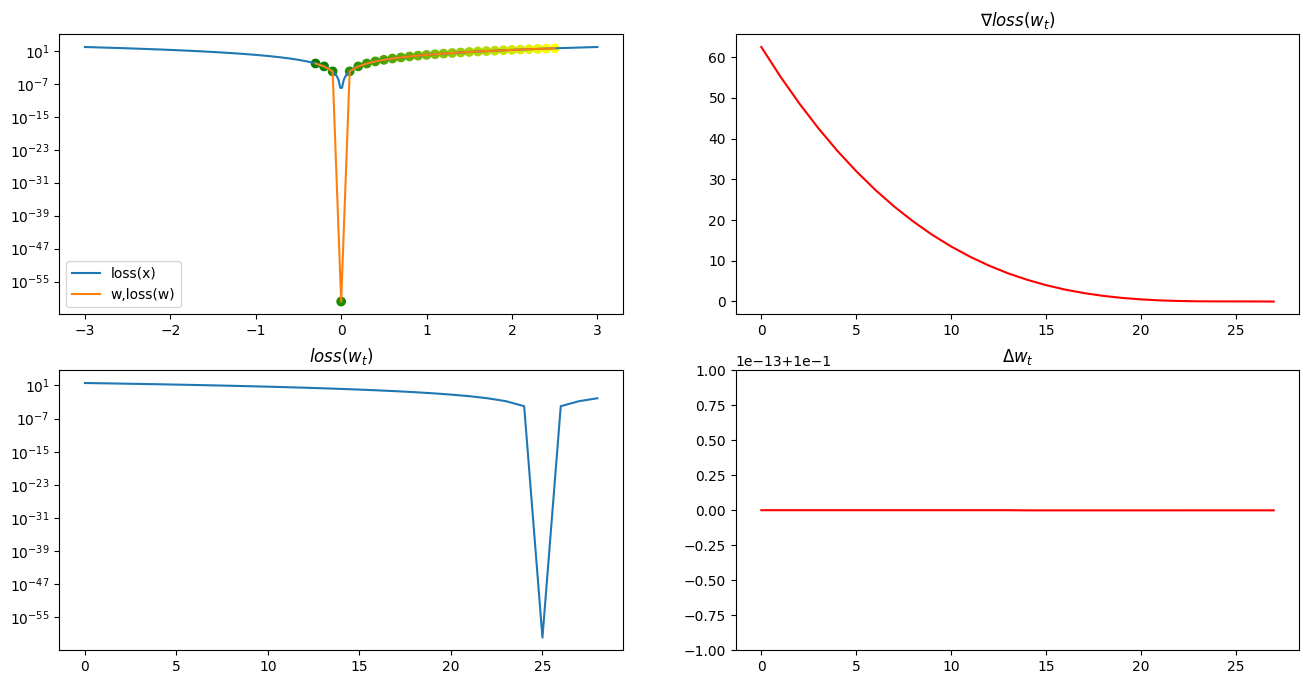

In [13]:
p(lambda x:x**4,lambda x:4*x**3, lion(0.1), -3, 3, noise=0.0001, w0=2.5, steps=28, log=True)
lion.exp_avg = 0

0.25858610774384844

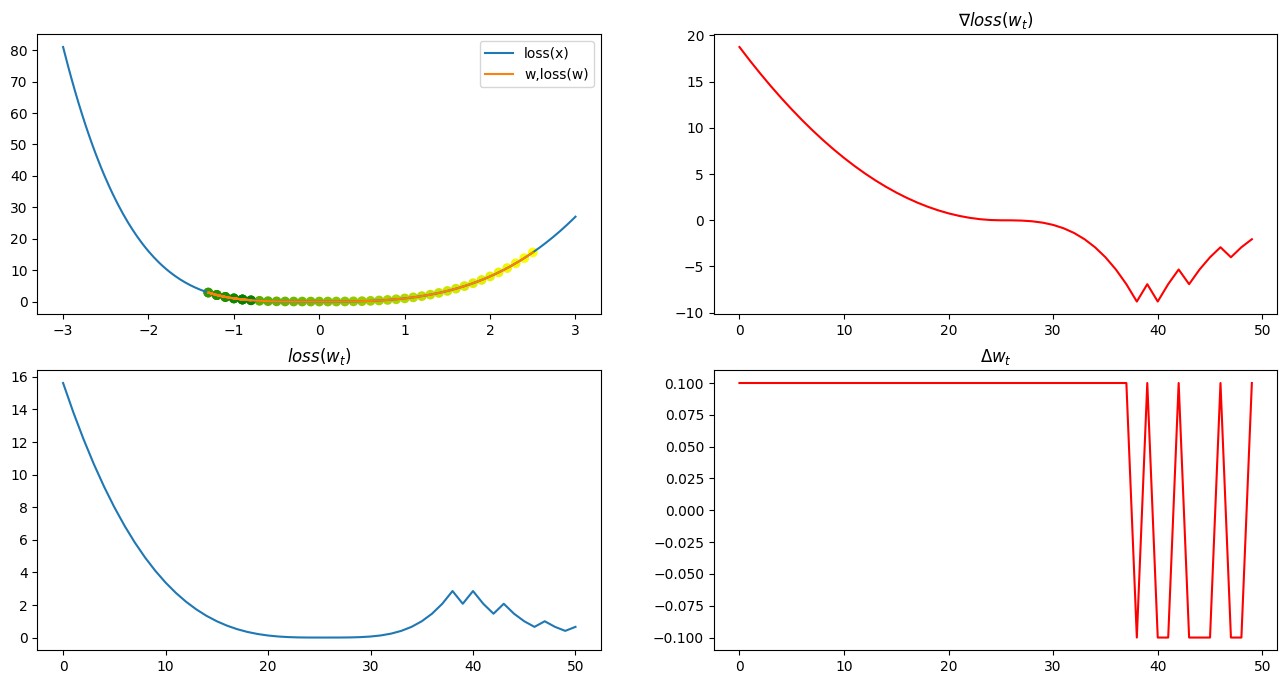

In [15]:
lion.exp_avg = 0 
f_prime = lambda x: np.where(x < 0, 4*x**3, np.where(x > 0, 3*x**2, 0))
    
p(lambda x: np.where(x < 0, x**4, np.where(x > 0, x**3, 0)), f_prime, lion(lr=0.1), -3, 3, noise=0.0001, w0=2.5, steps=50, log=False)
lion.exp_avg 

In [ ]:
p??

0.12861862598096196

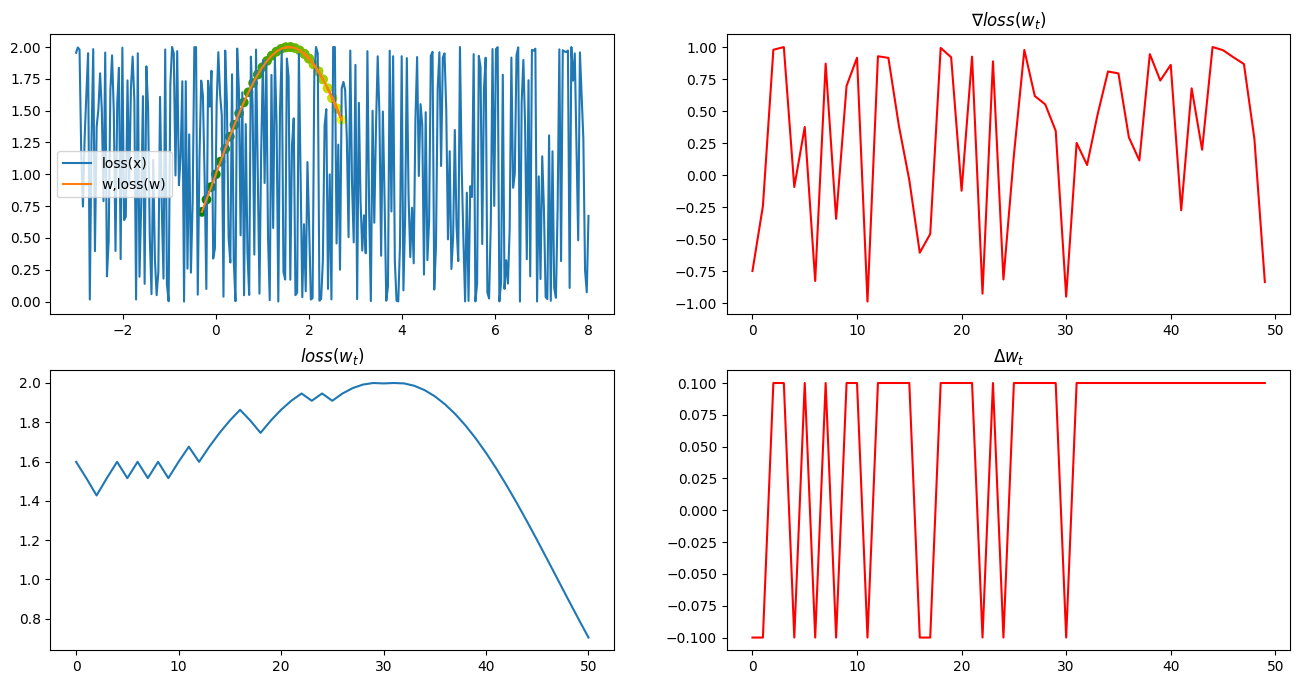

In [16]:
lion.exp_avg = 0
p(lambda x: np.sin(x)+1, lambda x: np.cos(x), lion(lr=0.1), -3, 8, noise=3, w0=2.5, steps=50, log=False)
lion.exp_avg 

0

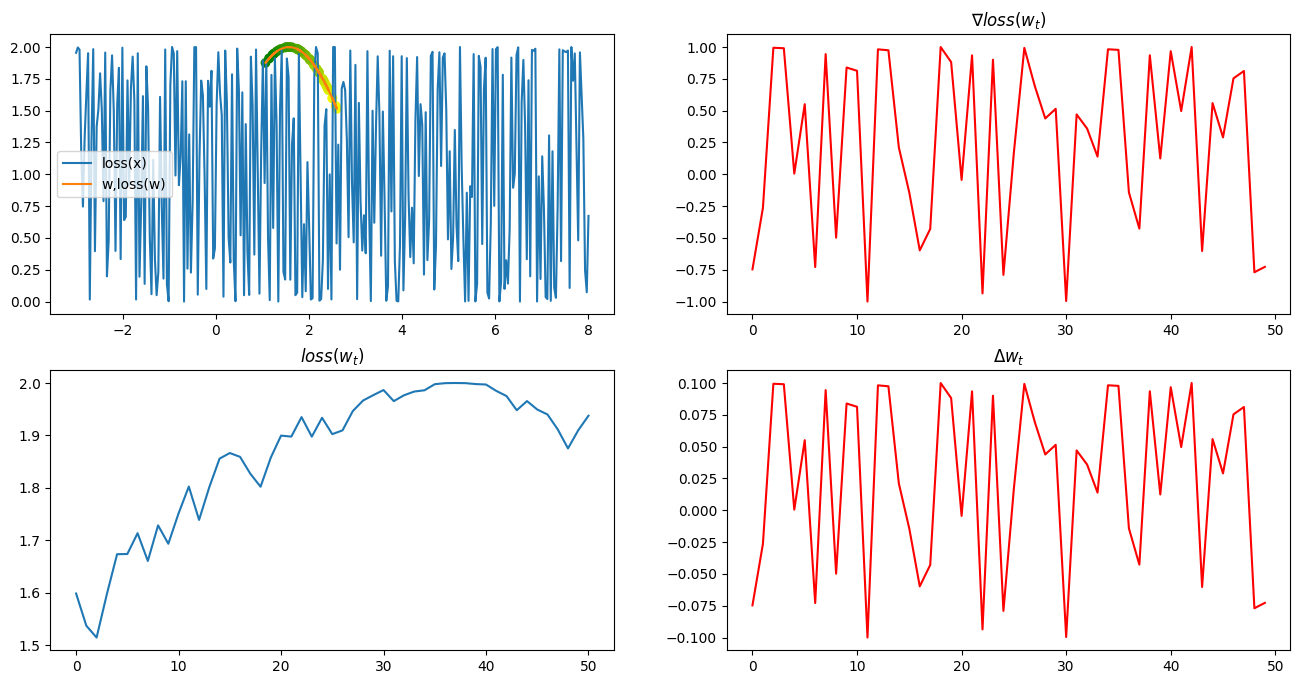

In [17]:
lion.exp_avg = 0
p(lambda x: np.sin(x)+1, lambda x: np.cos(x), partial(sgd, lr=0.1), -3, 8, noise=3, w0=2.5, steps=50, log=False)
lion.exp_avg 

In [18]:
from torch.optim import adamw
adamw.adamw??

Signature:
adamw.adamw(
    params: List[torch.Tensor],
    grads: List[torch.Tensor],
    exp_avgs: List[torch.Tensor],
    exp_avg_sqs: List[torch.Tensor],
    max_exp_avg_sqs: List[torch.Tensor],
    state_steps: List[torch.Tensor],
    foreach: bool = None,
    capturable: bool = False,
    *,
    amsgrad: bool,
    beta1: float,
    beta2: float,
    lr: float,
    weight_decay: float,
    eps: float,
    maximize: bool,
)
Source:   
def adamw(params: List[Tensor],
          grads: List[Tensor],
          exp_avgs: List[Tensor],
          exp_avg_sqs: List[Tensor],
          max_exp_avg_sqs: List[Tensor],
          state_steps: List[Tensor],
          # kwonly args with defaults are not supported by functions compiled with torchscript issue #70627
          # setting this as kwarg for now as functional API is compiled by torch/distributed/optim
          foreach: bool = None,
          capturable: bool = False,
          *,
          amsgrad: bool,
          beta1: float,
        

In [19]:
lion??

Signature: lion(lr)
Docstring: <no docstring>
Source:   
def lion(lr):
    lion.exp_avg = 0
    def lion_step(w, grad, lr=0.1, beta1=0.9, beta2=0.99):
        plus_minus = np.sign(lion.exp_avg * beta1 + grad * (1 - beta1))
        w -= lr * plus_minus
        lion.exp_avg = lion.exp_avg*beta2 + (1-beta2)*grad
        return w
    return lion_step
File:      /tmp/ipykernel_52062/1866195001.py
Type:      function

In [ ]:
def next_value_factory():
    values = np.array([0.1] * 100 + [5] * 10 + [0.1] * 1900)
    i = 0
    def next_value(x):
        if isinstance(x, np.ndarray):
            return x * 0
        nonlocal i
        j = i
        i = (i + 1) % len(values)
        return values[i]
    return next_value

    
p(
    lambda x: x*0,
    next_value_factory(),
    adam(1, 0.90, 0.999, 1e-8),
    start=0, end=6.28,
    noise=0.0001,
    x0=2.5,
    steps=2000
)

In [ ]:
np.sqrt(1-0.999) / (1-0.9)

In [ ]:
(1-0.9) / (0.999)**2

In [ ]:
def next_value_factory():
    values = np.array([0.1] * 100 + [0.5] * 10)
    i = 0
    def next_value(x):
        if isinstance(x, np.ndarray):
            return x * 0
        nonlocal i
        j = i
        i = (i + 1) % len(values)
        return values[i]
    return next_value

    
p(
    lambda x: x*0,
    next_value_factory(),
    sgd(1),
    start=0, end=6.28,
    noise=0.0001,
    x0=2.5,
    steps=200
)

In [ ]:
p(
    lambda x: np.sin(x) + 0.1 * np.sin(100*x),
    lambda x:np.cos(x) + 10*np.cos(100*x),
    sgd(0.01),
    start=0, end=6.28,
    noise=0.01,
    x0=2.5,
    steps=200
)

In [ ]:
p(
    lambda x: np.sin(x) + 0.1 * np.sin(100*x),
    lambda x:np.cos(x) + 10*np.cos(100*x),
    adam(0.2, 0.95, 0.95, 1e-8),
    start=0, end=6.28,
    noise=0.0001,
    x0=2.5,
    steps=200
)

In [ ]:
p(
    lambda x: np.sin(x) + 0.01 * np.sin(1000*x),
    lambda x:np.cos(x) + 10*np.cos(1000*x),
    adam(0.2, 0.95, 0.95, 1e-8),
    start=0, end=6.28,
    noise=0.0001,
    x0=2.5,
    steps=500
)

In [ ]:
p(
    lambda x: np.sin(x) + 0.01 * np.sin(1000*x),
    lambda x:np.cos(x) + 10*np.cos(1000*x),
    adam(0.2, 0.95, 0.95, 1e-8),
    start=0, end=6.28,
    noise=0.000,
    x0=2.5,
    steps=500
)

In [ ]:
p(
    lambda x: np.sin(x) + 0.01 * np.sin(1000*x),
    lambda x:np.cos(x) + 10*np.cos(1000*x),
    adam(0.2, 0.95, 0.95, 1e-8),
    start=0, end=6.28,
    noise=0.000,
    x0=2.5,
    steps=5000
)

In [ ]:
p(
    lambda x: np.sin(x) + 0.01 * np.sin(1000*x),
    lambda x:np.cos(x) + 10*np.cos(1000*x),
    adam(0.05, 0.95, 0.95, 1e-8),
    start=0, end=6.28,
    noise=0.000,
    x0=2.5,
    steps=500
)

In [ ]:
p(
    lambda x: np.sin(x) + 0.01 * np.sin(1000*x),
    lambda x:np.cos(x) + 10*np.cos(1000*x),
    adam(0.1, 0.95, 0.95, 1e-8),
    start=0, end=6.28,
    noise=0.0001,
    x0=2.5,
    steps=500
)

In [ ]:
p(
    lambda x: np.sin(x) + 0.01 * np.sin(1000*x),
    lambda x:np.cos(x) + 10*np.cos(1000*x),
    adam(0.1, 0.99, 0.998, 1e-8),
    start=0, end=6.28,
    noise=0.0001,
    x0=2.5,
    steps=500
)

In [ ]:
p(
    lambda x: np.sin(x) + 0.01 * np.sin(1000*x),
    lambda x:np.cos(x) + 10*np.cos(1000*x),
    sgd(0.01),
    start=0, end=6.28,
    noise=0.0001,
    x0=2.5,
    steps=500
)

In [ ]:
p(
    lambda x: np.sin(x) + 0.01 * np.sin(1000*x),
    lambda x:np.cos(x) + 10*np.cos(1000*x),
    sgd(0.02),
    start=0, end=6.28,
    noise=0.0001,
    x0=2.5,
    steps=500
)

In [ ]:
p(
    lambda x: np.sin(x) + 0.01 * np.sin(1000*x),
    lambda x:np.cos(x) + 10*np.cos(1000*x),
    sgd(0.015),
    start=0, end=6.28,
    noise=0.0001,
    x0=2.5,
    steps=500
)

In [ ]:
p(
    lambda x: np.sin(x) + 0.01 * np.sin(1000*x),
    lambda x:np.cos(x) + 10*np.cos(1000*x),
    sgd(0.002),
    start=0, end=6.28,
    noise=0.0001,
    x0=2.5,
    steps=10000
)